<a href="https://colab.research.google.com/github/enriqueasegura/Quantum-X/blob/master/ML_QMLHEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Part

You will explore how best to apply machine learning algorithms, for example, Neural Network, Boosted Decision Tree (BDT), Support Vector Machine(SVM) to solve a High Energy Data analysis issue, more specifically,  separating the signal events from the background events.

A set of input samples (simulated with Delphes) is provided in NumPy NPZ format  [Download Input](https://drive.google.com/open?id=1r_MZB_crfpij6r3SxPDeU_3JD6t6AxAj). In the input file, there are only 100 samples for training and 100 samples for testing so it won’t take much computing resources to accomplish this task. The signal events are labeled with 1 while the background sample are labeled with 0.

You can apply one machine learning algorithm to this input but be sure to show that you understand how to fine tune your machine learning model to improve the performance. The performance can be evaluated with classification accuracy or Area Under ROC Curve (AUC).


##Libraries Needed

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import pandas as pd
import scipy as sci 

import matplotlib
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.unicode']=True

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

from sklearn.metrics import accuracy_score
from matplotlib.pyplot import imshow

!sudo dpkg --configure -a
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  from ipykernel import kernelapp as app


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  ghostscript gsfonts libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libkpathsea6 libpotrace0 libptexenc1 libruby2.5
  libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum ri ruby-dev bundler
  debhelper perl-tk xpdf-reade

##Upload Sample Files

##Load Files

In [0]:
#load the files 
data = np.load('QIS_EXAM_200Events.npz', allow_pickle=True)

In [0]:
data.files

['training_input', 'test_input']

In [0]:
print('Data:')
data.files

Data:


['training_input', 'test_input']

In [0]:
training_data = data['training_input']
test_data = data['test_input']

In [0]:
def data_X(d):
  """
  This is a helper function
  It is meant to illustrate how to take the data from the current form
  and make it into something we can use to feed sklearn algorithms

  This function creates the NxM matrix X 
  and the last column is the feature vector which is N x 1

  """
  r, c = 100, 6
  r_data = np.ones((r,c))

  #print(r_b, c_b)

  training_data_background = d.item()['0']
  training_data_signal = d.item()['1']

  r_b, c_b = np.shape(training_data_background)

  #first we loop through the background data and feed it to the resulting data
  
  for i in range(r_b):
    for j in range(c_b):
      r_data[i][j] = training_data_background[i][j]
    #this is for background 
    r_data[i][j+1] = 0
  
  #now with the signal data
  for i in range(r_b):
    for j in range(c_b):
      r_data[r_b + i][j] = training_data_signal[i][j]
    #since this is signal, it should be with label 1 
  return r_data

#Notes to keep in mind 

Given $N$ data points and $M$ features, you want to create one $N \times M$ matrix $X$ (your design/feature matrix), and one $N \times 1$ vector (you label vector)

1. Feature matrix $X$ and label vector $y$.
2. Feed $X$ and $y$ into some classifier from sklearn.

Key point: 

1. Shuffle data so there are adjacent rows are not correlated. 
2. Split the data into training/testing sets (usually 80/20 split).

Thing to remember: 

This is a binary classification problem.

In [262]:
train_data = data_X(training_data)

train_data_dataframe = pd.DataFrame(train_data)
print('Data set with X : y:')
train_data_dataframe

Data set with X : y:


,0,1,2,3,4,5
0,-0.430791,0.868348,-0.926147,-0.926620,-0.569009,0.0
1,0.339242,0.561555,0.930975,-0.916317,-0.544635,0.0
2,-0.428889,0.870650,-0.927822,-0.775340,-0.583292,0.0
3,-0.432629,0.861289,-0.922409,-0.880489,-0.499631,0.0
4,-0.999253,-0.999496,0.077537,-0.842180,-0.514940,0.0
...,...,...,...,...,...,...
95,0.927897,-0.906354,-0.647231,-0.616369,-0.534791,1.0
96,-0.430184,0.865693,-0.925222,-0.723606,-0.505656,1.0
97,0.349044,0.585557,0.917345,-0.609937,-0.585279,1.0
98,0.344345,0.566294,0.930266,-0.606098,-0.649302,1.0


In [263]:
#now shuffle this data randomly 

train_data_shuffled = np.take(train_data,np.random.permutation(train_data.shape[0]),axis=0,out=train_data)
train_data_shuffled_dataframe = pd.DataFrame(train_data_shuffled)
print('Shuffled Matrix:')
train_data_shuffled_dataframe

Shuffled Matrix:


,0,1,2,3,4,5
0,-0.999437,-0.999603,0.077619,-0.848979,-0.572516,0.0
1,0.905604,-0.934457,-0.658050,-0.794735,-0.586262,1.0
2,-0.999097,-0.999338,0.077493,-0.833512,-0.393053,1.0
3,0.909994,-0.944291,-0.674616,-0.805186,-0.532965,1.0
4,0.340719,0.564942,0.929178,-0.885435,-0.458245,1.0
...,...,...,...,...,...,...
95,-0.429119,0.869610,-0.927325,-0.762039,-0.590116,0.0
96,0.895051,-0.945130,-0.673637,-0.697240,-0.660765,1.0
97,-0.999253,-0.999496,0.077537,-0.842180,-0.514940,0.0
98,-0.422981,0.886309,-0.936612,-0.649443,-0.391935,1.0


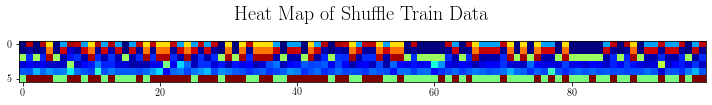

In [264]:
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(train_data_shuffled),                         #numpy array generating the image
           cmap = 'jet',             #color map used to specify colors
           interpolation='nearest'    #algorithm used to blend square colors; with 'nearest' colors will not be blended
          )
plt.title('Heat Map of Shuffle Train Data', fontsize=20)
plt.tight_layout()

In [265]:
#extract X matrix
X = train_data_shuffled[:,:-1]
print('X:')
pd.DataFrame(X)

X:


,0,1,2,3,4
0,-0.999437,-0.999603,0.077619,-0.848979,-0.572516
1,0.905604,-0.934457,-0.658050,-0.794735,-0.586262
2,-0.999097,-0.999338,0.077493,-0.833512,-0.393053
3,0.909994,-0.944291,-0.674616,-0.805186,-0.532965
4,0.340719,0.564942,0.929178,-0.885435,-0.458245
...,...,...,...,...,...
95,-0.429119,0.869610,-0.927325,-0.762039,-0.590116
96,0.895051,-0.945130,-0.673637,-0.697240,-0.660765
97,-0.999253,-0.999496,0.077537,-0.842180,-0.514940
98,-0.422981,0.886309,-0.936612,-0.649443,-0.391935


In [266]:
#extract y vector 

y = train_data_shuffled[:,-1]
print('y:')
pd.DataFrame(y)

y:


,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
95,0.0
96,1.0
97,0.0
98,1.0


In [267]:
#let's now do the same process for the test data file 

testing_data = data_X(test_data)
print('X : y for testing data')
pd.DataFrame(testing_data)

X : y for testing data


,0,1,2,3,4,5
0,-0.430804,0.863086,-0.923837,-0.728881,-0.539447,0.0
1,0.339557,0.563784,0.927209,-0.818439,-0.605889,0.0
2,0.888264,-0.944071,-0.668631,-0.751788,-0.605011,0.0
3,-0.996989,-0.998307,0.076140,-0.647370,-0.611079,0.0
4,-0.429876,0.867298,-0.925930,-0.773587,-0.459549,0.0
...,...,...,...,...,...,...
95,-0.429849,0.866236,-0.925597,-0.751273,-0.556766,1.0
96,0.344897,0.568306,0.933503,-0.895925,-0.625205,1.0
97,0.896302,-0.935064,-0.673095,-0.851844,-0.572966,1.0
98,0.888122,-0.950066,-0.664741,-0.741957,-0.598255,1.0


In [268]:
testing_data_shuffled = np.take(testing_data,np.random.permutation(testing_data.shape[0]),axis=0,out=testing_data)
print('Shuffled Data:')
pd.DataFrame(testing_data_shuffled)

Shuffled Data:


,0,1,2,3,4,5
0,-0.429849,0.866236,-0.925597,-0.751273,-0.556766,1.0
1,0.902768,-0.919140,-0.671166,-0.683973,-0.608494,1.0
2,-0.999553,-0.999707,0.077711,-0.868862,-0.565626,0.0
3,0.884841,-0.952501,-0.666935,-0.748759,-0.504335,1.0
4,-0.419104,0.884028,-0.936927,-0.041354,-0.353822,1.0
...,...,...,...,...,...,...
95,0.346298,0.575670,0.926969,-0.857082,-0.619315,1.0
96,-0.998677,-0.999201,0.077164,-0.786084,-0.585751,0.0
97,-0.996989,-0.998307,0.076140,-0.647370,-0.611079,0.0
98,-0.432227,0.862091,-0.922935,-0.880126,-0.538581,0.0


In [0]:
y_test_testing_data = testing_data_shuffled[:,-1]
x_test_testing_data = testing_data_shuffled[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
mlp = MLPClassifier(max_iter=1000)

In [0]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.00001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [287]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [1e-

In [0]:
y_true, y_pred = y_test , clf.predict(X_test)

In [289]:
print('Accuracy Score : ',accuracy_score(y_test, y_pred))

Accuracy Score :  0.9
